In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
data = pd.read_csv("data/AirPassengers.csv")
print(data.dtypes)

Month         object
Passengers     int64
dtype: object


In [15]:
data['Month'] = pd.to_datetime(data['Month'])
print(data.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [16]:
data.set_index('Month', inplace=True)

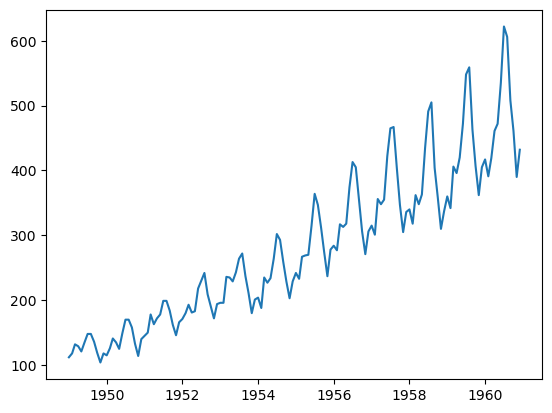

In [17]:
plt.plot(data['Passengers'])

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adf,pvalue,usedlag_, nobs_,critical_values_,icbest_ = adfuller(data) 

In [20]:
print("P-value = ",pvalue, "if above 0.05 data is not stationary ")

P-value =  0.991880243437641 if above 0.05 data is not stationary 


In [24]:
data['year'] = [d.year for d in data.index]
data['month'] = [d.strftime('%b') for d in data.index]
years = data['year'].unique()

C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='year', ylabel='Passengers'>

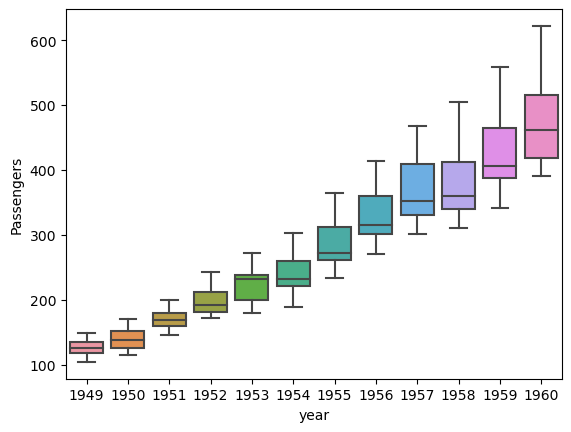

In [27]:
sns.boxplot(x='year', y='Passengers',data=data)

C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sazid\anaconda3\envs\pioneer\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='month', ylabel='Passengers'>

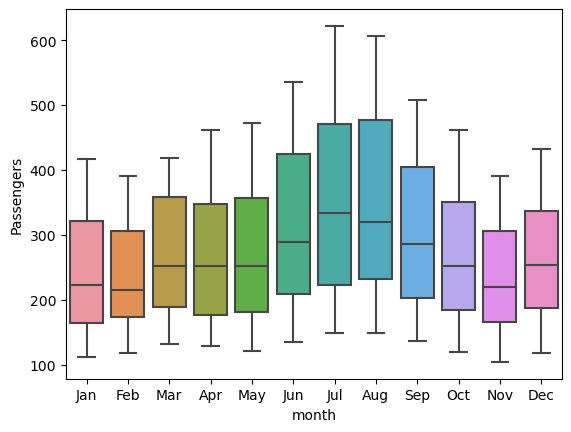

In [28]:
sns.boxplot(x='month', y='Passengers',data=data)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data['Passengers'], model = 'additive')

In [38]:
#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

In [39]:
trend = decomposed.trend

In [40]:
seasonal = decomposed.seasonal

In [43]:
residual = decomposed.resid

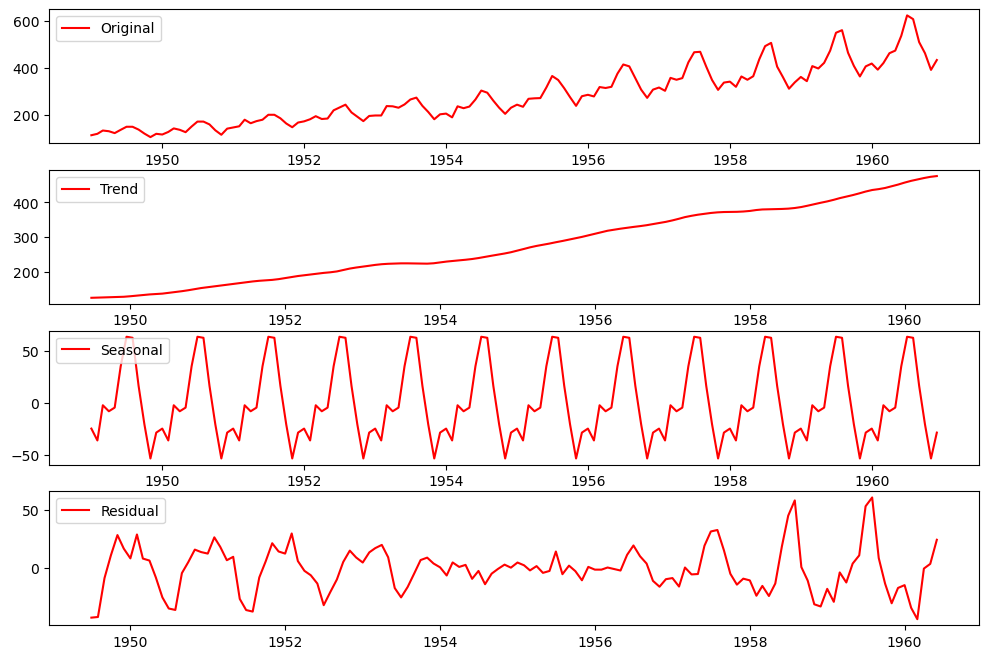

In [45]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Passengers'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.show()

In [46]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

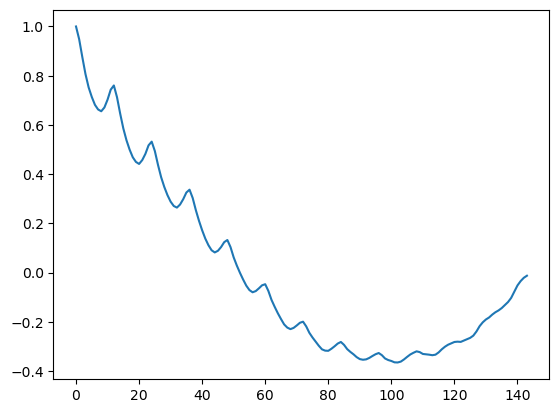

In [47]:
from statsmodels.tsa.stattools import acf

acf_144 = acf(data.Passengers, nlags=144)
plt.plot(acf_144)

In [50]:
#A strong positive correlation for lags below 40 (months)

In [48]:
#Obtain the same but with single line and more info...